### Example script for running the basic IBS implementation
We use data generated from simple discrimination orientation model and calculate its log-likelihood using IBS.
Because the analytical log-likelihood of this model is available, one can compare the results and verify the unbiasdness of the IBS estimator.

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from ibs_basic import ibs_basic
from psycho_generator import psycho_generator
from psycho_neg_logl import psycho_neg_logl

In [2]:
# Generate simulated dataset

num_trials = 600
eta = np.log(1)  # Fake subject (log) sensory noise
bias = 0.2  # Fake subject response bias
lapse = 0.03  # Fake subject lapse rate
# Generating parameter vector
theta_true = np.array([eta, bias, lapse])

# Generate stimulus orientation per trial
S = 3 * npr.normal(size=num_trials)

# Generate fake subject responses
R = psycho_generator(theta_true, S)

In [5]:
# Comparing estimated result to true value
print("exact log-likelihood:", -psycho_neg_logl(theta_true, S, R))
print(
    "log-likelihood obtained with IBS:",
    ibs_basic(psycho_generator, theta_true, R, S),
)

exact log-likelihood: -162.51024321773707
log-likelihood obtained with IBS: -161.19516338653773


I want to check the unbiasedness of the estimator by showing that the log-likelihood estimates are centred on the true value.
The bias function calculates 1000 log-likelihood estimates and returns an array with the difference between the estimates and the true value. A histogram of these estimates is then plotted. It can be seen that the distribution is centred around 0 and approximately Gaussian.

In [8]:
def bias(num_trials, theta, num_reps=1000):
    """
    Calculate vector of differences between IBS estimates and the true log-likelihood values.

    Parameters:
    ----------
    num_trials: int
        Number of trials for which to calculate the bias of the IBS estimator.
    theta: np.array with 3 elements
        The parameter vector, with theta(0) as eta=log(sigma), the log of the sensory noise,
        theta(1) as the bias term, theta(2) as the lapse rate.
    num_reps: int, optional
        The number of differences to calculate, default = 1000.

    Returns:
    ----------
    b: np.array
        The vector of differences between IBS estimates and the true log-likelihood values.
    """

    # Generate stimulus orientation per trial
    S = 3 * npr.normal(size=num_trials, scale=3)
    # Calculate bias = estimate - true value
    b = np.zeros(num_reps)
    for i in range(num_reps):
        R = psycho_generator(theta, S)
        L = psycho_neg_logl(theta, S, R)
        b[i] = L + ibs_basic(psycho_generator, theta, R, S)
    return b

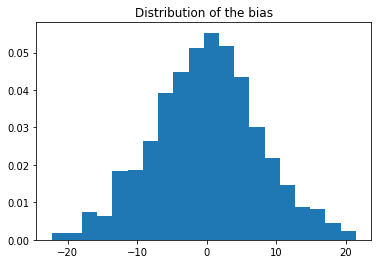

The mean of the bias is -0.07494483117025652


In [10]:
b = bias(num_trials, theta_true)
plt.hist(b, bins=20, density=True)
plt.title("Distribution of the bias")
plt.show()
print("The mean of the bias is", np.mean(b))